In [28]:
# !pip3 install tensorflow shutil

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from keras.layers import *
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import *
import shutil

In [116]:
def create_model():
    model = Sequential()
    
    model.add(Conv2D(32,(3,3),activation = "relu" , input_shape = (150,150,3)))
    model.add(Conv2D(56,(3,3), activation = "relu" ))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(72,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(128,(3,3),activation = "relu"))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(64,activation = "relu"))
    model.add(Dense(3,activation = "softmax"))
    model.summary()
    return model

In [117]:
create_model()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 146, 146, 56)      16184     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 73, 73, 56)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 71, 71, 72)        36360     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 35, 35, 72)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 33, 33, 128)       83072     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 128)      

In [118]:
def drawimage(image,title="hair_length"):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title,fontsize=20)
    plt.show()

## Data Preparation

In [119]:
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

In [120]:
pth = Path("images/")
for file in pth.glob("*"):
    cnt=0
    for img in file.glob("*.jpg"):
        cnt+=1
    print(str(file).split("/")[-1])
    print(cnt)

images\long
64
images\medium
64
images\short
63


In [121]:
#dictionardi
digit2label ={0:"long",1:"medium",2:"short"}

### how to create the val file

In [122]:
os.listdir("images")

['long', 'medium', 'short']

In [123]:
if not  os.path.isdir("val_img"):
    os.mkdir("./val_img")

In [124]:
print(os.listdir("val_img"))
for i in digit2label.items():
    x,y=i
    print(x)
    print(y)

['long', 'medium', 'short']
0
long
1
medium
2
short


In [125]:
for c in digit2label.items():
    label,l_name = c
    pth = os.path.join("val_img",l_name)
    print(pth)
    if not os.path.isdir(pth):
        print(pth)
        os.mkdir(pth)

val_img\long
val_img\medium
val_img\short


In [126]:
print(os.listdir("val_img"))

['long', 'medium', 'short']


In [127]:
split = 0.9
for f in os.listdir("images"):
    p = os.path.join("images/"+f)
    img = os.listdir(p)
    
    split_size = int(split*int(len(img)))
    file_2_mv = img[split_size:]
    print(len(file_2_mv))
    
    for imgfile in file_2_mv:
        src = "images/"+f+"/"+imgfile
        des = "val_img/"+f+"/"+imgfile
        
        print(src)
        print(des)
        
        shutil.move(src,des)

7
images/long/61_256.jpg
val_img/long/61_256.jpg
images/long/62_256.jpg
val_img/long/62_256.jpg
images/long/63_256.jpg
val_img/long/63_256.jpg
images/long/64_256.jpg
val_img/long/64_256.jpg
images/long/65_256.jpg
val_img/long/65_256.jpg
images/long/66_256.jpg
val_img/long/66_256.jpg
images/long/67_256.jpg
val_img/long/67_256.jpg
7
images/medium/61_256.jpg
val_img/medium/61_256.jpg
images/medium/62_256.jpg
val_img/medium/62_256.jpg
images/medium/63_256.jpg
val_img/medium/63_256.jpg
images/medium/64_256.jpg
val_img/medium/64_256.jpg
images/medium/65_256.jpg
val_img/medium/65_256.jpg
images/medium/66_256.jpg
val_img/medium/66_256.jpg
images/medium/67_256.jpg
val_img/medium/67_256.jpg
7
images/short/60_256.jpg
val_img/short/60_256.jpg
images/short/61_256.jpg
val_img/short/61_256.jpg
images/short/62_256.jpg
val_img/short/62_256.jpg
images/short/63_256.jpg
val_img/short/63_256.jpg
images/short/64_256.jpg
val_img/short/64_256.jpg
images/short/65_256.jpg
val_img/short/65_256.jpg
images/short/6

In [128]:
len(os.listdir("val_img/short/"))

32

### ImageGenerator

In [129]:
image_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [130]:
img_gen_dir = image_gen.flow_from_directory("images/",
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset = 'training'                                                              
            )

Found 137 images belonging to 3 classes.


In [131]:
label ,cnt_label = np.unique(img_gen_dir.labels,return_counts = True)
print(label,cnt_label)

[0 1 2] [46 46 45]


************************************************************
(32, 150, 150, 3)
(32, 3)
0


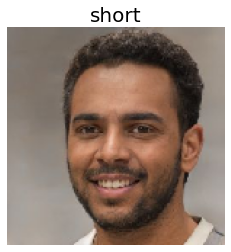

************************************************************
(32, 150, 150, 3)
(32, 3)
32


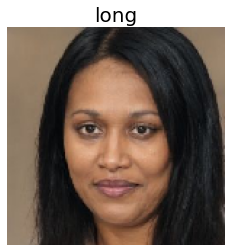

************************************************************
(32, 150, 150, 3)
(32, 3)
64


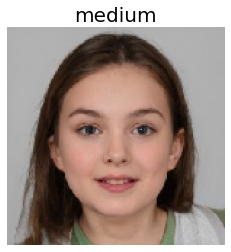

************************************************************
(32, 150, 150, 3)
(32, 3)
96


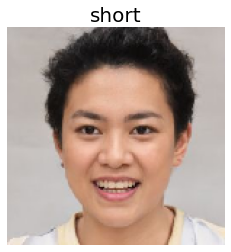

************************************************************
(9, 150, 150, 3)
(9, 3)
128


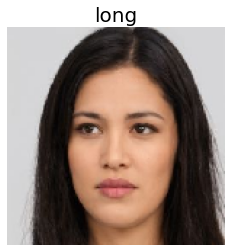

************************************************************
(32, 150, 150, 3)
(32, 3)
137


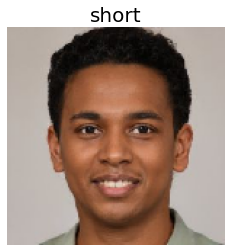

************************************************************
(32, 150, 150, 3)
(32, 3)
169


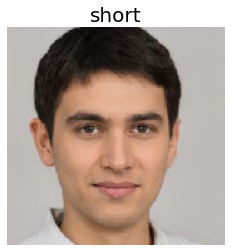

In [132]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  img_gen_dir:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    drawimage(x[1],digit2label[y[1].argmax()])

    cnt+=x.shape[0]
    if cnt > 200:
        break

In [133]:
validation_generator = image_gen.flow_from_directory(
        'images/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset = "validation"
)

Found 33 images belonging to 3 classes.


************************************************************
(32, 150, 150, 3)
(32, 3)
0


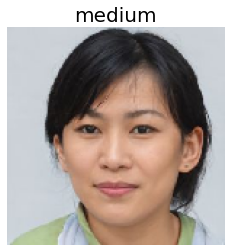

************************************************************
(1, 150, 150, 3)
(1, 3)
32


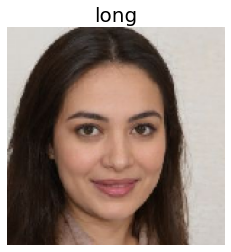

************************************************************
(32, 150, 150, 3)
(32, 3)
33


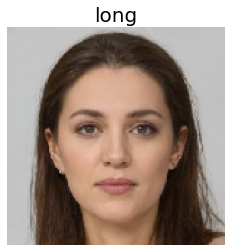

In [148]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    
    #image draw
    drawimage(x[0],digit2label[y[0].argmax()])
    cnt+=x.shape[0]
    if cnt > 50:
        break

In [149]:
print(img_gen_dir.samples)
print(validation_generator.samples)

137
33


## Training our Model

In [150]:
from keras.optimizers import Adam
adam = Adam(lr = 1e-04)

In [151]:
model = create_model()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 146, 146, 56)      16184     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 73, 73, 56)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 71, 71, 72)        36360     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 35, 35, 72)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 33, 33, 128)       83072     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 128)     

In [152]:
class_model = create_model()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 146, 146, 56)      16184     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 73, 73, 56)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 71, 71, 72)        36360     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 35, 35, 72)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 33, 33, 128)       83072     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 128)     

In [153]:
class_model.compile(optimizer=adam ,loss = "categorical_crossentropy",metrics=["accuracy"])

In [154]:
batchsize = 32
n_epoch = 20

In [155]:
hist = class_model.fit_generator(img_gen_dir
                                ,steps_per_epoch=img_gen_dir.samples//batchsize,
                                epochs=n_epoch,
                                 validation_data=validation_generator,
                                 validation_steps=validation_generator.samples//batchsize
                                )

Epoch 1/20
4/4 [==============================] - 4s 906ms/step - loss: 1.1045 - accuracy: 0.3333 - val_loss: 1.0898 - val_accuracy: 0.3438
Epoch 2/20
4/4 [==============================] - 3s 868ms/step - loss: 1.0819 - accuracy: 0.4286 - val_loss: 1.0669 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 3s 872ms/step - loss: 1.0662 - accuracy: 0.5238 - val_loss: 1.0470 - val_accuracy: 0.4375
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 1.0283 - accuracy: 0.6562 - val_loss: 1.0107 - val_accuracy: 0.5312
Epoch 5/20
4/4 [==============================] - 4s 885ms/step - loss: 1.0006 - accuracy: 0.6190 - val_loss: 0.9657 - val_accuracy: 0.5312
Epoch 6/20
4/4 [==============================] - 4s 1s/step - loss: 0.9419 - accuracy: 0.6857 - val_loss: 0.9176 - val_accuracy: 0.7188
Epoch 7/20
4/4 [==============================] - 5s 1s/step - loss: 0.8508 - accuracy: 0.7619 - val_loss: 0.8873 - val_accuracy: 0.5312
Epoch 8/20
4/4 [=============

## Graph plot

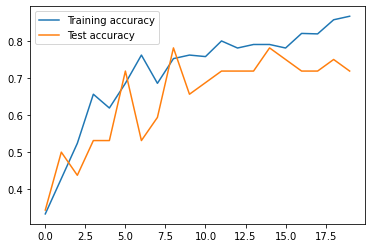

In [156]:
plt.plot(hist.history["accuracy"],label="Training accuracy")
plt.plot(hist.history["val_accuracy"],label="Test accuracy")
plt.legend()

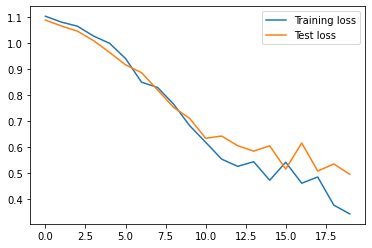

In [157]:
plt.plot(hist.history["loss"],label="Training loss")
plt.plot(hist.history["val_loss"],label="Test loss")
plt.legend()

### Prediction

In [158]:
pred = class_model.predict(x)
pred[0]

array([0.7553985 , 0.24002977, 0.00457175], dtype=float32)

************************************************************
(32, 150, 150, 3)
(32, 3)
0


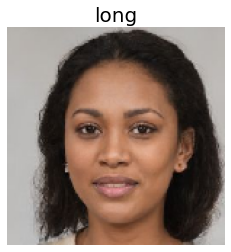

************************************************************
(1, 150, 150, 3)
(1, 3)
1


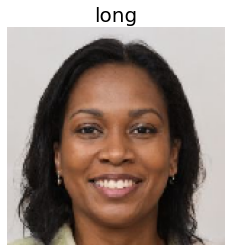

************************************************************
(32, 150, 150, 3)
(32, 3)
2


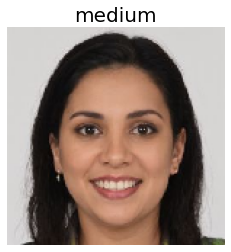

************************************************************
(1, 150, 150, 3)
(1, 3)
3


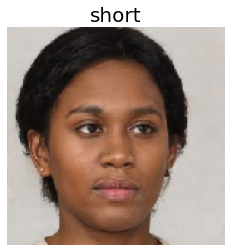

************************************************************
(32, 150, 150, 3)
(32, 3)
4


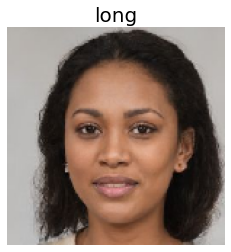

************************************************************
(1, 150, 150, 3)
(1, 3)
5


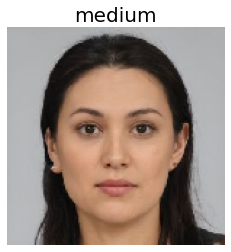

************************************************************
(32, 150, 150, 3)
(32, 3)
6


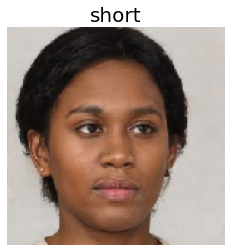

************************************************************
(1, 150, 150, 3)
(1, 3)
7


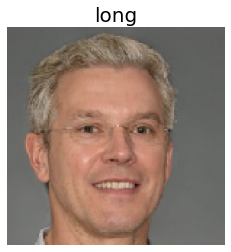

************************************************************
(32, 150, 150, 3)
(32, 3)
8


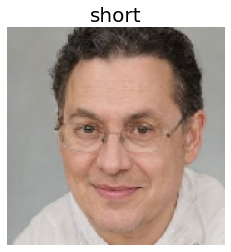

************************************************************
(1, 150, 150, 3)
(1, 3)
9


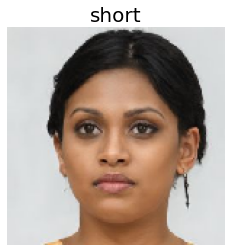

************************************************************
(32, 150, 150, 3)
(32, 3)
10


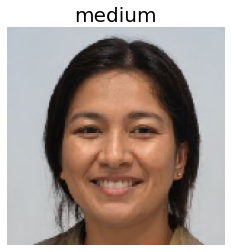

************************************************************
(1, 150, 150, 3)
(1, 3)
11


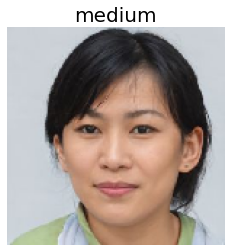

************************************************************
(32, 150, 150, 3)
(32, 3)
12


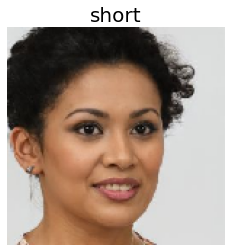

************************************************************
(1, 150, 150, 3)
(1, 3)
13


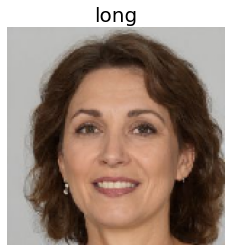

************************************************************
(32, 150, 150, 3)
(32, 3)
14


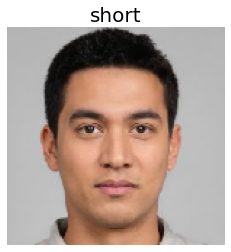

************************************************************
(1, 150, 150, 3)
(1, 3)
15


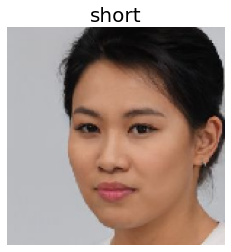

************************************************************
(32, 150, 150, 3)
(32, 3)
16


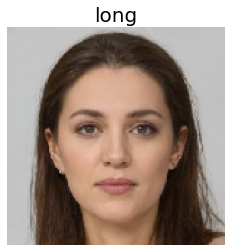

************************************************************
(1, 150, 150, 3)
(1, 3)
17


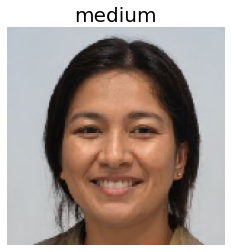

************************************************************
(32, 150, 150, 3)
(32, 3)
18


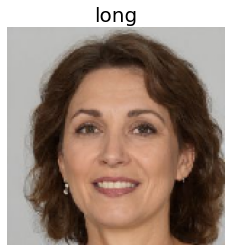

************************************************************
(1, 150, 150, 3)
(1, 3)
19


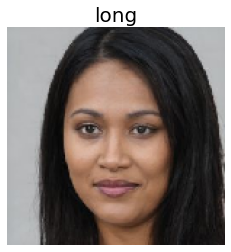

************************************************************
(32, 150, 150, 3)
(32, 3)
20


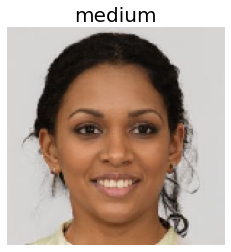

In [161]:
#batch size of until it reach the no of image
cnt=0
for x ,y in  validation_generator:
    print("*"*60)
    print(x.shape)#batch size vector
    print(y.shape)#one hot vector
    print(cnt)
    pred = class_model.predict(x)
    #image draw
    drawimage(x[0],digit2label[pred[0].argmax()])
    cnt+=1
    if cnt > 20:
        break